# MAI391 Assignment03

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import math

In [57]:
df = pd.read_csv('data/stock21_clean.csv')

In [58]:
df

,ticker,exchange,shortName,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,outstandingShare,issueShare,companyType,monthlyRecords,file_monthly_datas
0,DHT,HNX,Dược phẩm Hà Tây,Bán lẻ,Retail,2001,795,749,0.271,http://www.hataphar.com.vn,2.8,26.4,26.4,CT,DHT.csv,DHT.csv
1,DGW,HOSE,Thế Giới Số,Bán lẻ,Retail,2003,612,1228,0.259,https://digiworld.com.vn,2.9,163.1,163.2,CT,DGW.csv,DGW.csv
2,TTH,HNX,TM và DV Tiến Thành,Bán lẻ,Retail,2003,21,1452,0.003,http://www.tienthanhjsc.vn,NaN,37.4,37.4,CT,TTH.csv,TTH.csv
3,MWG,HOSE,Thế giới di động,Bán lẻ,Retail,2004,40756,20628,0.490,http://www.mwg.vn,2.9,1463.6,1463.9,CT,MWG.csv,MWG.csv
4,PIT,HOSE,XNK PETROLIMEX,Bán lẻ,Retail,2004,215,1607,0.008,http://www.pitco.com.vn,2.2,14.2,15.2,CT,PIT.csv,PIT.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,AVC,UPCOM,Thủy điện A Vương,"Điện, nước & xăng dầu khí đốt",Utilities,2012,154,146,0.000,http://avuong.com,3.3,75.1,75.1,CT,AVC.csv,AVC.csv
792,TDM,HOSE,Nước Thủ Dầu Một,"Điện, nước & xăng dầu khí đốt",Utilities,2013,22,352,0.073,http://www.tdmwater.vn,3.0,100.0,100.0,CT,TDM.csv,TDM.csv
793,HND,UPCOM,Nhiệt điện Hải Phòng,"Điện, nước & xăng dầu khí đốt",Utilities,2015,872,542,0.000,http://www.ndhp.com.vn,2.8,500.0,500.0,CT,HND.csv,HND.csv
794,VPD,HOSE,Phát triển Điện lực Việt Nam,"Điện, nước & xăng dầu khí đốt",Utilities,2015,128,6862,0.001,http://www.vnpd.com.vn,3.0,106.6,106.6,CT,VPD.csv,VPD.csv


In [59]:
df = df.select_dtypes(exclude=['object'])
df

,establishedYear,noEmployees,noShareholders,foreignPercent,stockRating,outstandingShare,issueShare
0,2001,795,749,0.271,2.8,26.4,26.4
1,2003,612,1228,0.259,2.9,163.1,163.2
2,2003,21,1452,0.003,NaN,37.4,37.4
3,2004,40756,20628,0.490,2.9,1463.6,1463.9
4,2004,215,1607,0.008,2.2,14.2,15.2
...,...,...,...,...,...,...,...
791,2012,154,146,0.000,3.3,75.1,75.1
792,2013,22,352,0.073,3.0,100.0,100.0
793,2015,872,542,0.000,2.8,500.0,500.0
794,2015,128,6862,0.001,3.0,106.6,106.6


In [60]:
df.describe()

,establishedYear,noEmployees,noShareholders,foreignPercent,stockRating,outstandingShare,issueShare
count,796.000000,796.000000,796.000000,796.000000,639.000000,796.000000,796.000000
mean,2004.876884,1500.443467,4045.640704,0.079629,2.705008,232.913065,224.048995
std,7.168760,4411.350988,10223.629707,0.151739,0.394762,650.513276,639.230027
min,1959.000000,0.000000,0.000000,0.000000,1.400000,0.900000,1.100000
25%,2003.000000,89.000000,131.000000,0.001000,2.400000,18.000000,17.300000
50%,2006.000000,300.500000,749.000000,0.011000,2.700000,48.200000,46.750000
75%,2008.000000,1006.500000,2862.750000,0.075500,3.000000,127.725000,125.300000
max,2022.000000,65325.000000,126621.000000,0.986000,4.000000,6713.200000,6743.400000


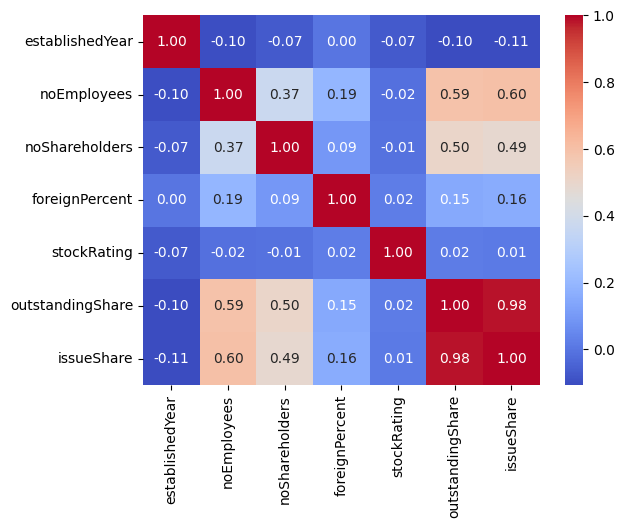

In [61]:
plt.figure()
sns.heatmap(df.corr(), fmt = ".2f", annot=True, cmap='coolwarm')
plt.show()

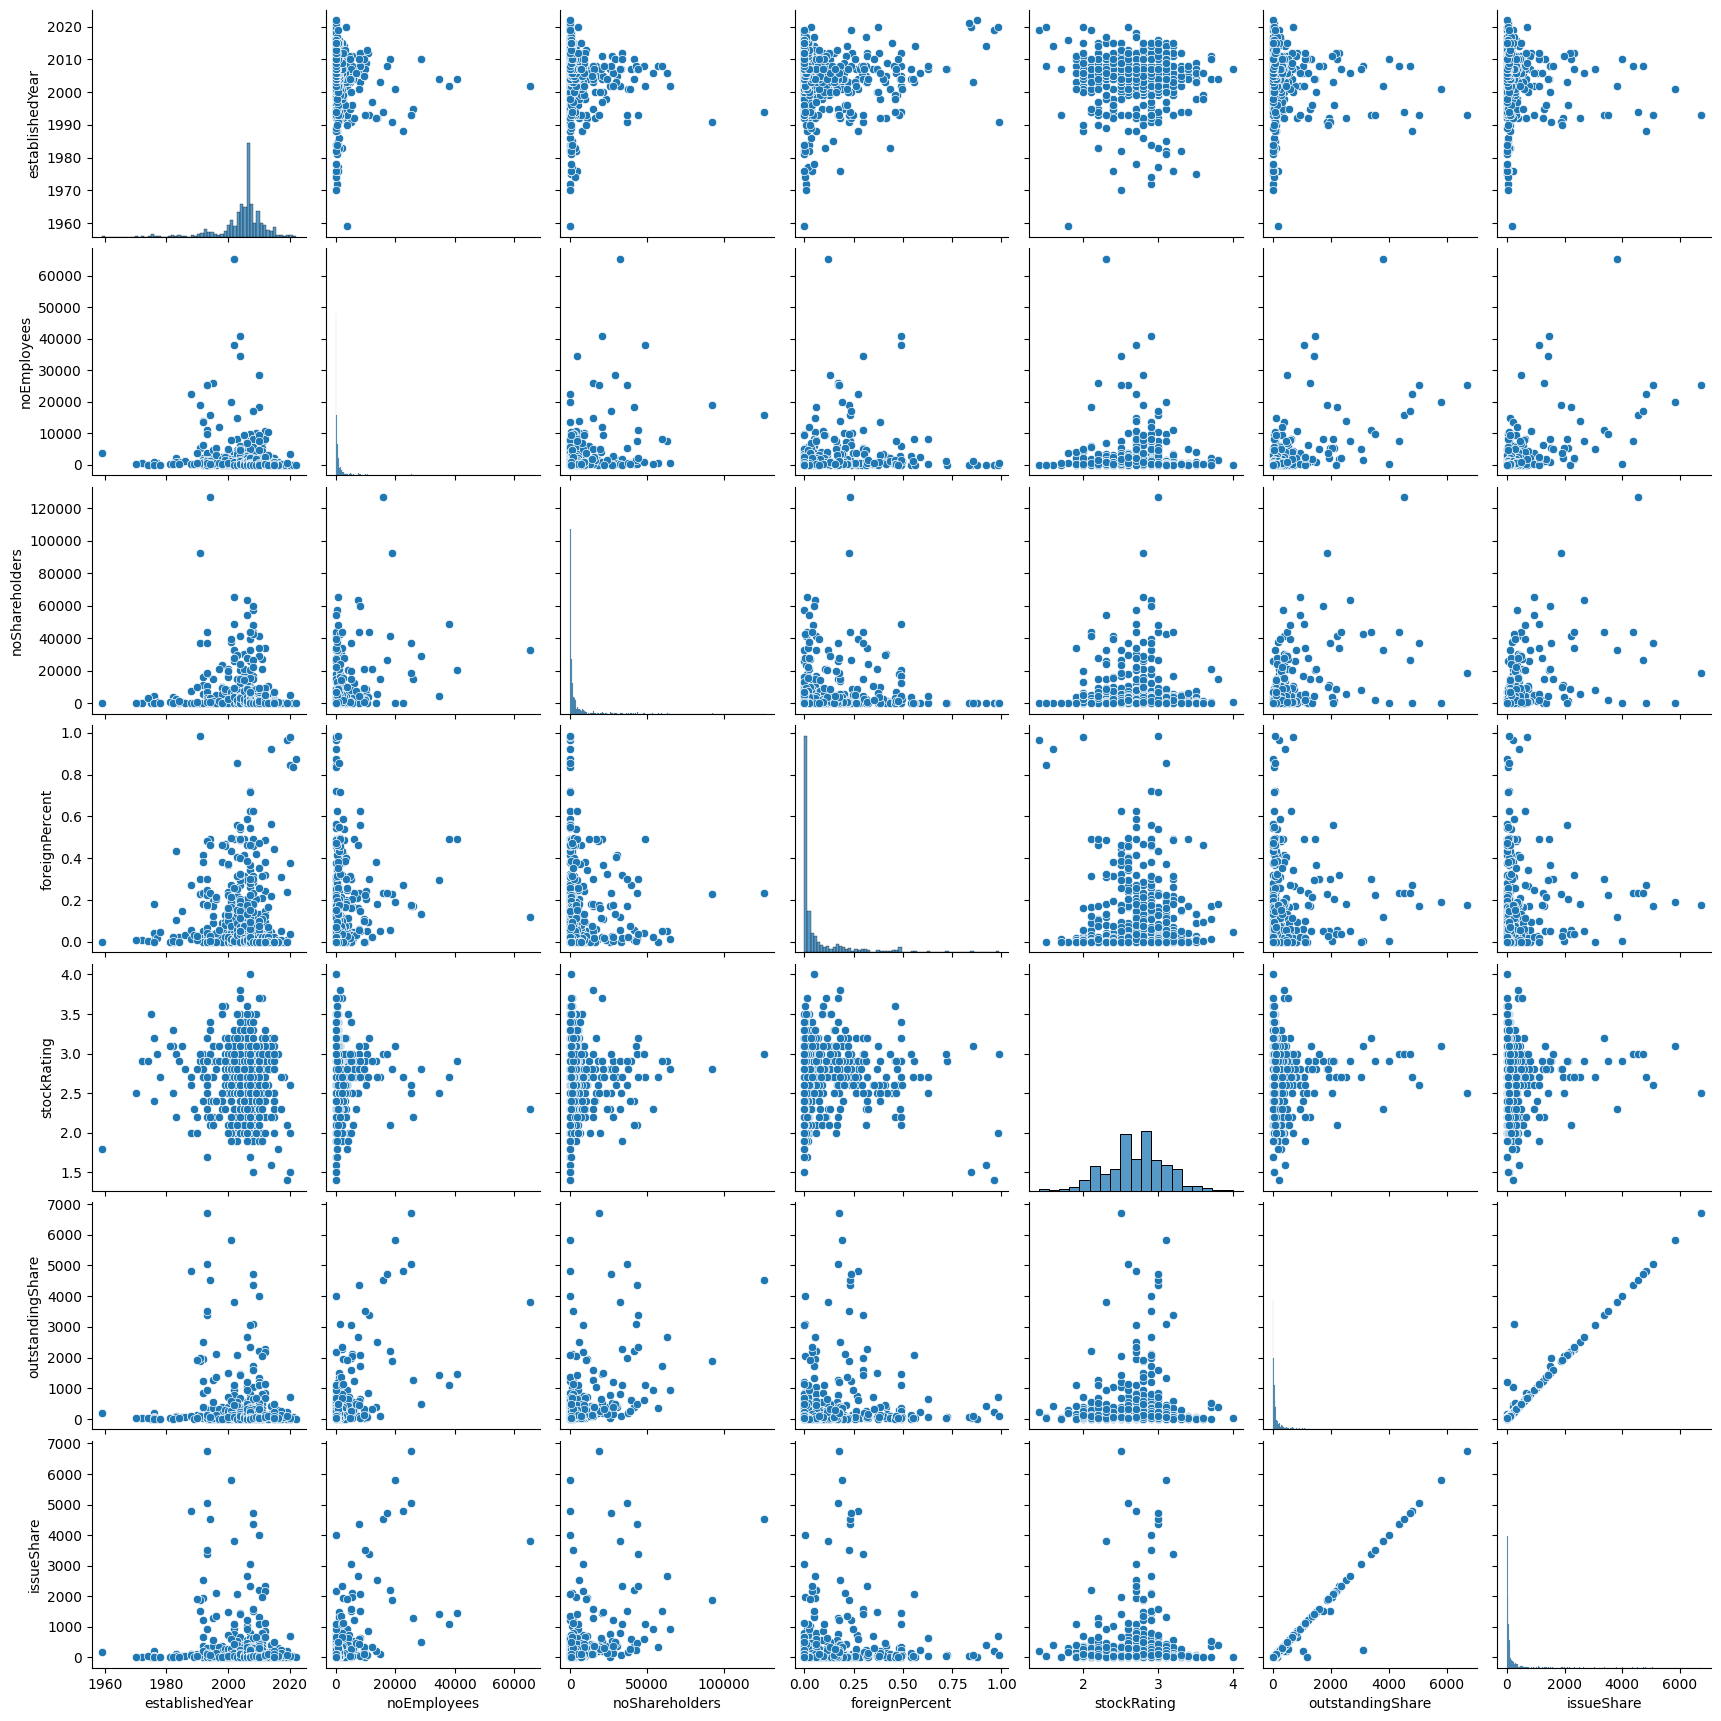

In [62]:
sns.pairplot(df)

After exploration, we observed a linear relationship between issueShare and outstandingShare with a correlation coefficient of up to 0.98. Therefore, we decided to use these two indicators to apply the regression model.

In [63]:
df = df[['issueShare', 'outstandingShare']]

In [64]:
df

,issueShare,outstandingShare
0,26.4,26.4
1,163.2,163.1
2,37.4,37.4
3,1463.9,1463.6
4,15.2,14.2
...,...,...
791,75.1,75.1
792,100.0,100.0
793,500.0,500.0
794,106.6,106.6


### 1. Plotting the data

In [65]:
X = df['issueShare']
y = df['outstandingShare']

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
len(X_train), len(y_train), len(X_test), len(y_test)

(636, 636, 160, 160)

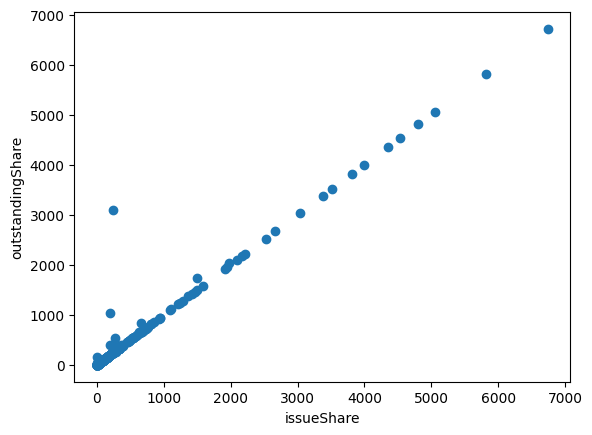

In [67]:
plt.figure()
plt.scatter(X_train, y_train)   
plt.xlabel('issueShare')
plt.ylabel('outstandingShare')
plt.show()

### 2. Normalize the data

In [68]:
def featureNormalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm

In [69]:
X_train = featureNormalize(X)
y_train = featureNormalize(y)

In [70]:
print(X_train)
print(y_train)

0     -0.309393
1     -0.095251
2     -0.292174
3      1.940820
4     -0.326925
         ...   
791   -0.233160
792   -0.194182
793    0.431964
794   -0.183851
795   -0.338196
Name: issueShare, Length: 796, dtype: float64
0     -0.317661
1     -0.107387
2     -0.300741
3      1.893060
4     -0.336428
         ...   
791   -0.242750
792   -0.204449
793    0.410837
794   -0.194297
795   -0.335197
Name: outstandingShare, Length: 796, dtype: float64


### 3. Gradient Descent

#### 3.1. Initialize theta value

In [71]:
iter = 1500 #interation
learning_rate = 0.01 #learning rate

np.random.seed(113) #random seed to make the result reproducible

theta0 = np.random.rand()
theta1 = np.random.rand()

In [72]:
print('theta0:', theta0)
print('theta1:', theta1)

theta0: 0.8519854927300882
theta1: 0.07390359884225994


#### 3.2. Compute Cost Function

In [73]:
def computeCost(X, y, theta0, theta1):
    m = len(y)
    h = theta0 + theta1 * X
    J = (1/(2*m)) * np.sum(np.square(h-y))
    return J

In [74]:
computeCost(X_train, y_train, theta0, theta1)

0.7929578936042669

#### 3.3. Gradient Descent

In [75]:
# Gradient descent
def gradientDescent(X, y, theta0, theta1, learning_rate, iter):
    m = len(y)
    J_history = np.zeros(iter)
    for i in range(iter):
        h = theta0 + theta1 * X
        theta0 = theta0 - learning_rate * (1/m) * np.sum(h - y)
        theta1 = theta1 - learning_rate * (1/m) * np.sum((h - y) * X)
        J_history[i] = computeCost(X, y, theta0, theta1)
        if i % 100 == 0:
            print(f'Iteration: {i}, Cost: {J_history[i]}')
    return theta0, theta1, J_history


In [76]:
theta0, theta1, J_history = gradientDescent(X_train, y_train, theta0, theta1, learning_rate, iter)

print('theta0: ', theta0)
print('theta1: ', theta1)

Iteration: 0, Cost: 0.777496142718142
Iteration: 100, Cost: 0.1180124372846388
Iteration: 200, Cost: 0.029655024856534037
Iteration: 300, Cost: 0.017816927468125705
Iteration: 400, Cost: 0.016230863029089857
Iteration: 500, Cost: 0.01601836263124405
Iteration: 600, Cost: 0.015989891897033485
Iteration: 700, Cost: 0.015986077397320986
Iteration: 800, Cost: 0.01598556633188976
Iteration: 900, Cost: 0.015985497859509448
Iteration: 1000, Cost: 0.0159854886856022
Iteration: 1100, Cost: 0.015985487456485092
Iteration: 1200, Cost: 0.01598548729180838
Iteration: 1300, Cost: 0.015985487269745045
Iteration: 1400, Cost: 0.015985487266789014
theta0:  2.416707535213295e-07
theta1:  0.9838844025309844


In [78]:
def predict(X, theta0, theta1):
    y_pred = theta0 + theta1 * X
    return y_pred

In [79]:
# Predict for the X_test
y_pred_test = predict(X_test, theta0, theta1)

print('Predicted values:', y_pred_test)
print('Actual values:', y_test)

Predicted values: 627      27.056821
367       9.838844
113     196.776881
396     359.412972
338      12.200167
          ...     
226      12.888886
124       7.871075
617      15.742151
282       4.722645
382    1854.818876
Name: issueShare, Length: 160, dtype: float64
Actual values: 627      32.5
367      10.0
113     200.0
396     361.5
338      12.4
        ...  
226      13.1
124       7.9
617      16.0
282       4.8
382    1885.2
Name: outstandingShare, Length: 160, dtype: float64


In [80]:
# mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [81]:
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Percentage Error: 4.658813921399252


In [82]:
# Example
X_example = 5152
y_example = predict(X_example, theta0, theta1)
y_example

5068.972442081303

### 4. Visualizing

#### 4.1 Visualizing the CostFunction 

In [83]:
# Generate theta0 and theta1 values
theta0_vals = np.linspace(-1, 1, 100)
theta1_vals = np.linspace(-1, 1, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute cost for each pair of theta0 and theta1 values
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i, j] = computeCost(X_train, y_train, theta0_vals[i], theta1_vals[j])

In [84]:
# Surface plot:
fig = go.Figure(data=[go.Surface(z=J_vals.T, x=theta0_vals, y=theta1_vals)])
fig.update_layout(scene = dict(
                    xaxis_title='theta0',
                    yaxis_title='theta1',
                    zaxis_title='Cost'),
                    width=800,
                    height=600)
# show theta0, theta1 points
fig.add_trace(go.Scatter3d(x=[theta0], y=[theta1], z=[computeCost(X_train, y_train, theta0, theta1)], 
                           mode='markers', marker=dict(size=5, color='red')))


fig.show()

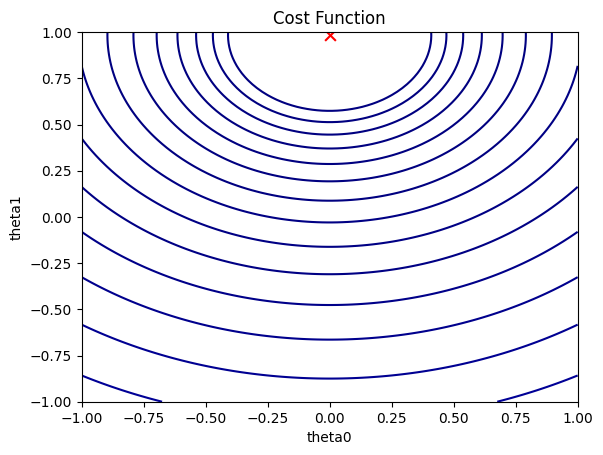

In [85]:
# Contour plot:
plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-1, 2, 30), cmap='jet')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Cost Function')
plt.scatter(theta0, theta1, color='red', marker='x', s=60)

plt.show() 


#### 4.2. Plotting the covergence

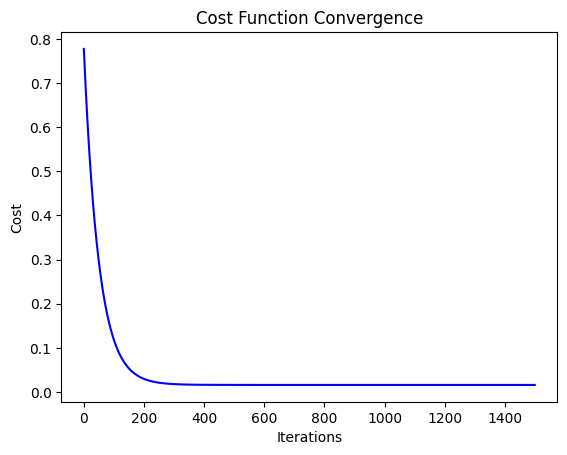

In [86]:
#Plotting the Convergence
plt.figure()
plt.plot(range(iter), J_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

#### 4.3 Plot the linear regression

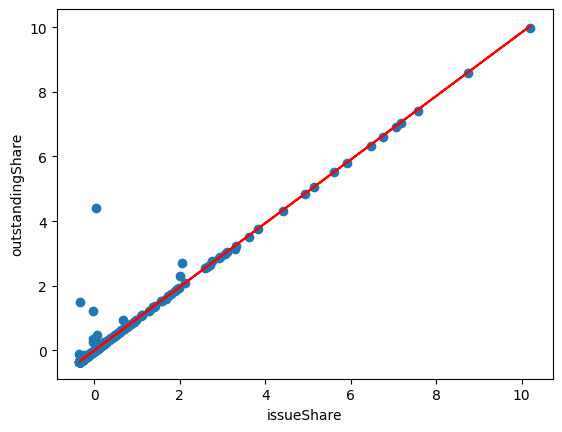

In [87]:
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_train, theta0 + theta1*X_train, color='red')
plt.xlabel('issueShare')
plt.ylabel('outstandingShare')
plt.show()